In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans

In [ ]:
# 과일 데이터 다운로드 하기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-15 12:14:47--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-15 12:14:47--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-15 12:14:47--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [ ]:
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100 * 100)

In [ ]:
# 주성분 : 전체 데이터의 분산을 가장 잘 설명하는 성분
# 분산이 커져야 데이터 사이의 차이점이 명확해짐

pca = PCA(n_components = 50) # 몇 개의 특성으로 데이터의 차원을 줄일지
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


In [ ]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

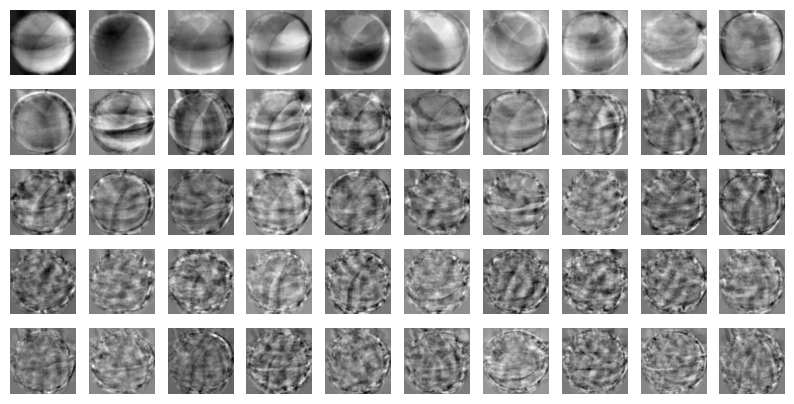

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
# 새로운 주성분으로 데이터 변환
# 차원이 축소된 것을 확인할 수 있음

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [ ]:
# 주성분 분석으로 인해 축소된 차원을 다시 복구
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

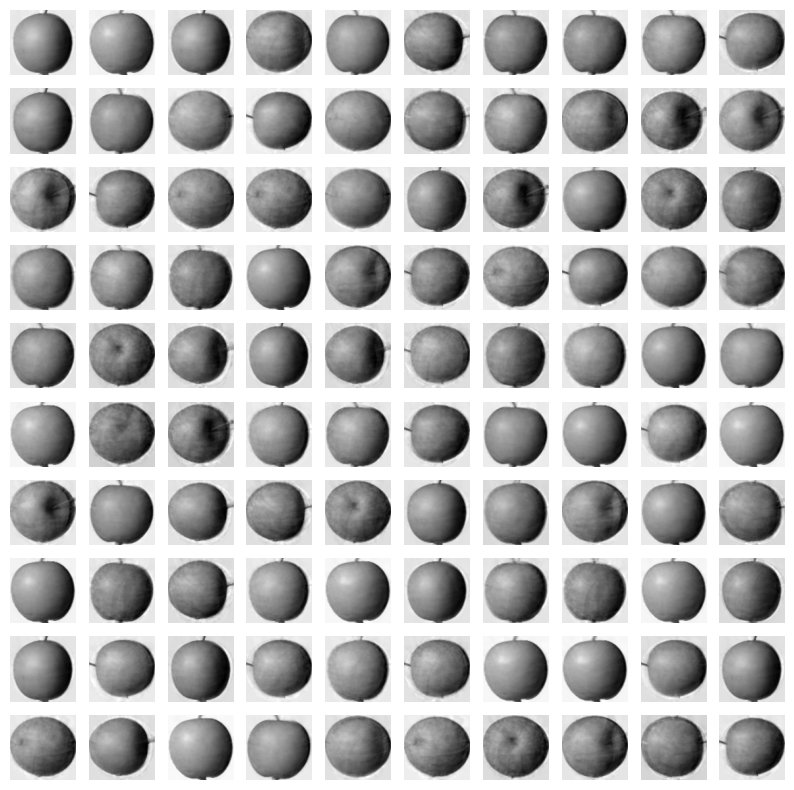

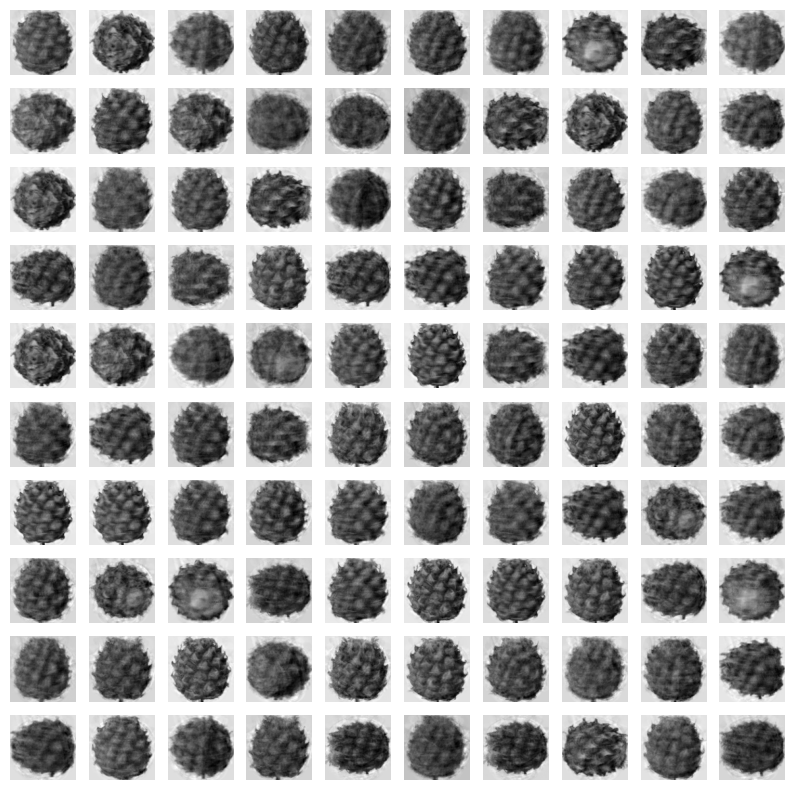

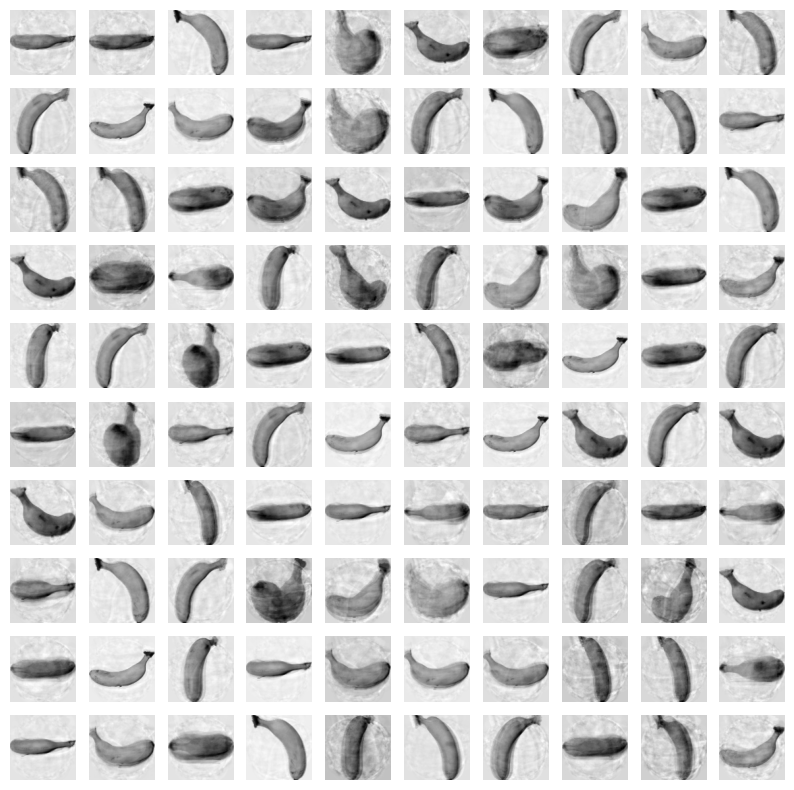

In [ ]:
for i in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[i:i+100])
  print('\n')

In [ ]:
# 주성분 벡터가 이루는 축에 투영한 결과의 분산의 비율
# 50개의 주성분이 전체 분산의 92%를 설명하고 있음을 알 수 있음

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511202
 0.00486382 0.00480347 0.00447836 0.0043732  0.00408042 0.0038947
 0.00372432 0.00359284 0.00331456 0.00317792 0.0030434  0.00303744
 0.00288943 0.00275862 0.00264928 0.00255878 0.00252022 0.00247084
 0.00239435 0.00231046 0.00221841 0.00216445 0.00213576 0.00195933
 0.00193195 0.00190675 0.00184179 0.00182369 0.00173886 0.00169791
 0.00162606 0.001608  ]
0.9215823645605893


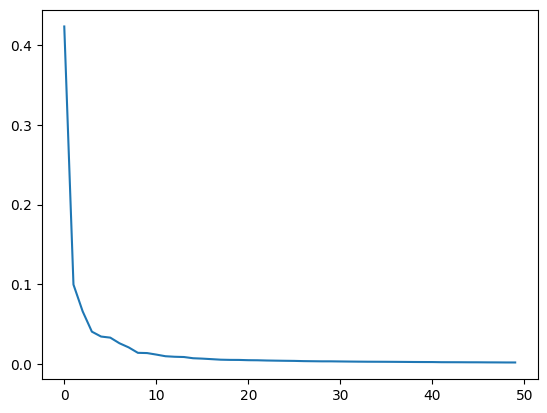

In [ ]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
lr = LogisticRegression()

In [ ]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
# 모델 반복 학습(교차 검증) : 주성분 분석 X

# cross_validate(평가모델, 훈련 데이터, 시험 데이터)
scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores['test_score'])) # 평가 점수
print(np.mean(scores['fit_time'])) # 학습 시간

0.9966666666666667
2.5389532089233398


In [ ]:
# 모델 반복 학습(교차 검증) : 주성분 분석 O
# 학습 속도와 성능이 좋아진 것을 확인할 수 있음

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.04207592010498047


In [ ]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
# 주성분이 두 개만 있어도 대부분의 분산을 설명할 수 있음
print(pca.n_components_)

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9933333333333334
0.11891045570373535


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# kmeans의 정답과 그 개수를 출력
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


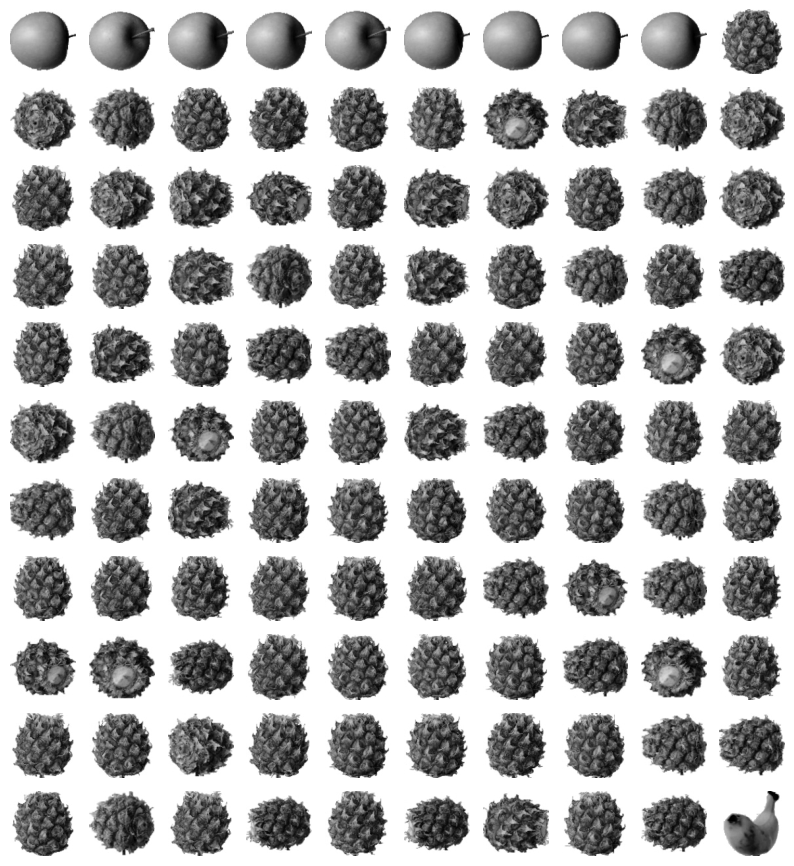



0


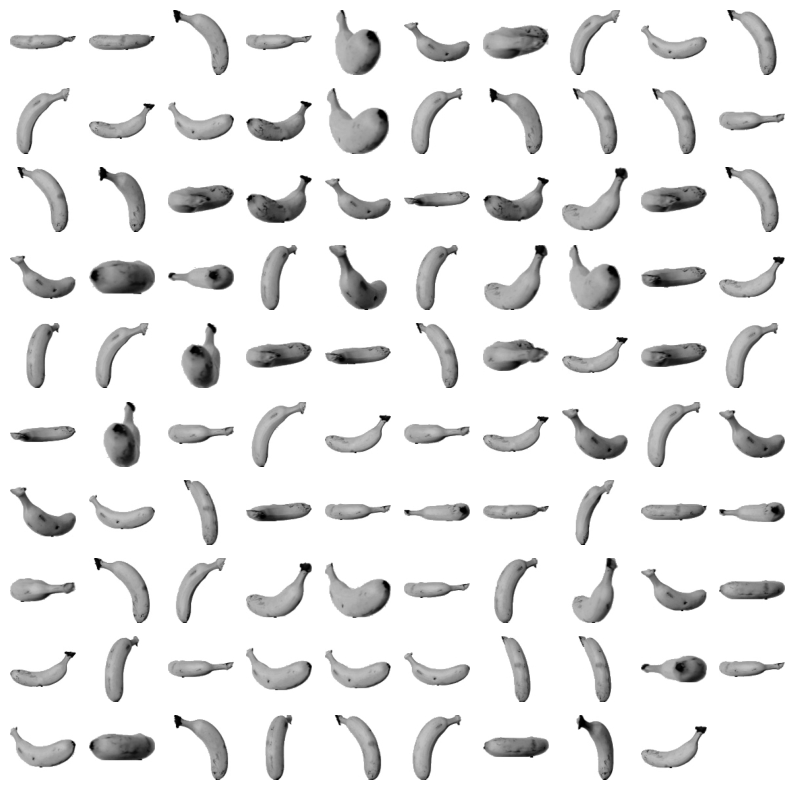



1


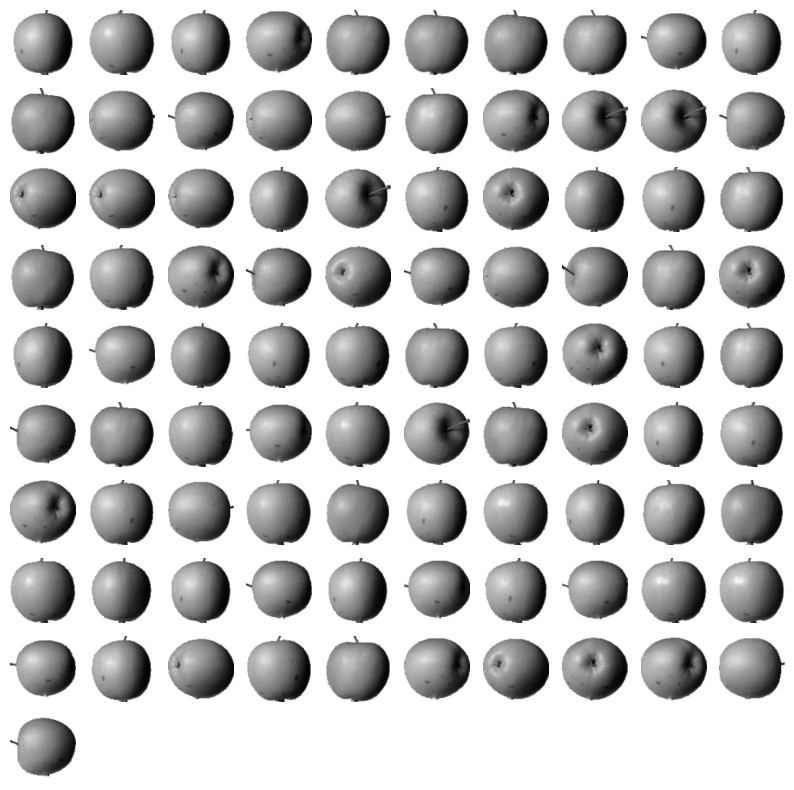



2


In [ ]:
for label in range(3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')
  print(label)

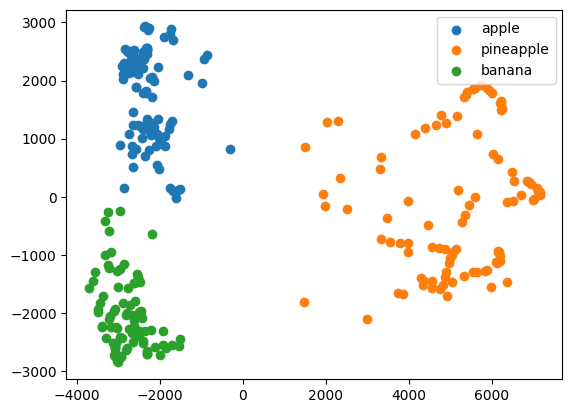

In [ ]:
for i in range(3):
  data = fruits_pca[km.labels_ == i]
  plt.scatter(data[:, 0], data[:, 1])

plt.legend(['apple', 'pineapple', 'banana'])
plt.show()